[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/tutorial_notebooks/5_data_prep_solutions.ipynb) 

# Tutorial 5 - Pandas library for data preparation
The notebook revisits our lecture on EDA and data preparation. In this scope, you will further deepen your understanding of **Pandas**, the goto library for working with tabular data in Python. We will exemplify two core Pandas classes *data series* and *data frame*. To that end, the demo notebook introduces a real-world data associated with credit scoring. 

Here is the outline for today:
- The HMEQ data set
- Pandas reloaded ...
- Data preparation
- Explanatory data analysis

Before moving on, let's import some of our standard library so that we have them ready when we need them.

In [162]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


## The HMEQ data set
Our data set, called the  "Home Equity" or, in brief, HMEQ data set, is provided by www.creditriskanalytics.net. It comprises  information about a set of borrowers, which are categorized along demographic variables and variables concerning their business relationship with the lender. A binary target variable called 'BAD' is  provided and indicates whether a borrower has repaid her/his debt. You can think of the data as a standard use case of binary classification.

You obtain the data, together with other interesting finance data sets, directly from www.creditriskanalytics.net. The website also provides a brief description of the data set. Specifically, the data set consists of 5,960 observations and 13 features including the target variable. The variables are defined as follows:

- BAD: the target variable, 1=default; 0=non-default 
- LOAN: amount of the loan request
- MORTDUE: amount due on an existing mortgage
- VALUE: value of current property
- REASON: DebtCon=debt consolidation; HomeImp=home improvement
- JOB: occupational categories
- YOJ: years at present job
- DEROG: number of major derogatory reports
- DELINQ: number of delinquent credit lines
- CLAGE: age of oldest credit line in months
- NINQ: number of recent credit inquiries
- CLNO: number of credit lines
- DEBTINC: debt-to-income ratio

As you can see, the features aim at describing the financial situation of a borrower. We will keep using the data set for many modeling tasks in this demo notebook and future demo notebook. So it makes sense to familiarize yourself with the above features. Make sure you understand what type of information they provide and what this information might reveal about the risk of defaulting.  

---

# Foundations of the Pandas Library

## Loading data from the WWW
The `Pandas` library supports various ways to load data from, e.g., your hard disk, a server somewhere in your network, etc. Here, we consider the easiest setting, which is loading data from the web. All we need for this is an URL. The following code loads the data directly from our [BADS repository](https://github.com/Humboldt-WI/bads).

In [163]:
import pandas as pd  # import library

# Load the data directly from GitHub
data_url = 'https://raw.githubusercontent.com/Humboldt-WI/bads/master/data/hmeq.csv'
df = pd.read_csv(data_url)

# To show that everything worked out, we can print the first few rows of the data frame
df.head(10)  # print ten rows

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


## Eyeballing data 
The Pandas data frame provides a ton of useful functions for data handling. We begin with showcasing some standard functions that one needs every time when working with data. 

In [164]:
# Query some properties of the data
print('Dimensionality of the data is {}'.format(df.shape))  # .shape returns a tupel
print('The data set has {} cases.'.format(df.shape[0]))     # we can also index the elements of that tupel
print('The total number of elements is {}.'.format(df.size))

Dimensionality of the data is (5960, 13)
The data set has 5960 cases.
The total number of elements is 77480.


In [165]:
# Obtain a more technical overview of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


The above output displays some useful information how exactly data is stored. We learn about the data type of each feature (i.e, each *data series* object), missing values, and the total amount of memory that the data consumes.

In [166]:
# Produce summary statistics (to R-programmers: this is equivalent to the famous R function summary())
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


The previous demos gave as an overview of the data. However, if you compare the output to the `describe()` function list of features given on the www.creditriskanalytics.net website (see above), you will notice that we are missing some features. For example, we lack a summary of the feature *REASON*; same with *JOB*. If you think about it, that actually makes sense. The result from the function `info()` showed how these features are stored as data type *object*. They are not stored as numeric variables. Consequently, statistical / mathematical operations like computing a mean or quantile are undefined and cannot be computed for these variables. That said, you can still force the `describe()` function to consider all features in its output. 

## Navigating data
We discussed indexing and slicing in the contexts of Python `lists` and other containers like dictionaries. In `Pandas`, `Numpy`, and other libraries, indexing/slicing are equally important and work in similar ways. Here, we provide a few more demos on common ways to use indexing in `Pandas`. A web search for "pandas data frame indexing" will provide many additional insights if you are interested. Likewise, feel free to skip this part if you already feel comfortable with data frame indexing.

### Basic indexing of rows and columns

In [167]:
# Accessing a single column by name
df['BAD']
# Alternatively, you can access a single column using dot-notation
df.BAD

0       1
1       1
2       1
3       1
4       0
       ..
5955    0
5956    0
5957    0
5958    0
5959    0
Name: BAD, Length: 5960, dtype: int64

For the *R* programmers: we can index our data in a way similar to *R*. Note the use of `loc[]`. This is a special type of syntax you need to memorize. Also note that we specify the columns we want to index using a `list`. Hence the inner box bracket.

In [168]:
# R-style indexing of selected rows and columns
df.loc[0:4, ["BAD", "LOAN"]]  # select row 0, 1, 2, 3 and for those rows only the columns BAD and LOAN

,BAD,LOAN
0,1,1100
1,1,1300
2,1,1500
3,1,1500
4,0,1700


In [169]:
# Access columns by a numerical index using .iloc
df.iloc[0:4, 0]
df.iloc[0:4, [0, 3, 5]]
df.iloc[0:4, np.arange(4)]

,BAD,LOAN,MORTDUE,VALUE
0,1,1100,25860.0,39025.0
1,1,1300,70053.0,68400.0
2,1,1500,13500.0,16700.0
3,1,1500,NaN,NaN


A few cautionary notes on numerical indexing in Python. The function `iloc()` considers the index of the data frame. In the above output, this is the left-most column without header. We have not defined a custom row index and Python uses consecutive integer numbers by default. However, a data frame could also have a custom index. In such a case, calls to `iloc()` need to refer to the custom index. It is good practice to eyeball a data frame and verify the way in which rows are indexed prior to using `iloc()`.
<br>

### Other common forms of indexing and subset selection
It is also common practice to select rows based on comparisons of feature values using. You can achieve this using `.loc`. Here are a few examples:

In [170]:
df.loc[df.BAD == 1, :]  # Get all observations with target variable BAD = 1. The : means you want to retrieve all columns 

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5930,1,72300,NaN,85000.0,DebtCon,Other,1.0,0.0,0.0,117.166667,9.0,23.0,NaN
5931,1,75400,NaN,89609.0,DebtCon,Other,1.0,0.0,0.0,115.763534,9.0,23.0,41.105569
5932,1,76500,38206.0,90000.0,DebtCon,Other,12.0,0.0,0.0,134.900000,0.0,26.0,NaN
5933,1,77200,83962.0,215000.0,HomeImp,Self,8.0,1.0,2.0,71.533132,3.0,14.0,NaN


In [171]:
df.loc[df["NINQ"]>12, ["LOAN", "VALUE", "NINQ"]]  # Another example where we select only a subset of the columns

,LOAN,VALUE,NINQ
44,3000,14500.0,14.0
2593,15000,26100.0,17.0
3661,19300,135000.0,13.0
4014,21000,136249.0,13.0


When working with high-dimensional data sets, you will often perform certain actions only with columns or a specific data type. To that end, you should know the function `select_dtypes`.

In [172]:
df.select_dtypes(float)  # select all numerical columns 

,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...
5955,57264.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


## Manipulating data
We often have to manipulate data. For example, imputing missing values as part of data preparation (see later) will require us to change the data stored in a data frame. `Pandas` supports many ways to manipulate data. Let's introduce a few common options. 

### Using in-build Pandas functions
Many functions that `Pandas`provide result in data changes. One example is the `sort_values` function, which we demonstrate below. By default, functions like `sort_values` do not alter the data in a `DataFrame` directly. Instead, they return a new `DataFrame` in which the data was changed. Here is an example. 


In [173]:
df_sorted = df.sort_values(by="LOAN", ascending=False)  # We can specify the column by which to sort and the order; next to other arguments
df_sorted.head(10)  # Print a preview of the data; like above when introducing the method .head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5954,0,88900,48919.0,93371.0,DebtCon,Other,15.0,0.0,1.0,205.650159,0.0,15.0,34.818262
5953,0,88800,53307.0,94058.0,DebtCon,Other,16.0,0.0,0.0,218.304978,0.0,15.0,34.242465
5952,0,88500,50240.0,94687.0,DebtCon,Other,16.0,0.0,0.0,214.426206,0.0,16.0,34.751158
5951,0,88300,54004.0,94838.0,DebtCon,Other,16.0,0.0,0.0,193.702051,0.0,15.0,36.262691
5950,0,87500,55938.0,86794.0,DebtCon,Other,15.0,0.0,0.0,223.881040,0.0,16.0,36.753653


Note the row index (left-most column). The index tells us that the order of the rows is different. That was to be expected because we sorted the the feature *LOAN*. In the original data, which we store in the variable `df`, we still have the original row order.

In [174]:
df.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


The point of the demo was to show that, by default, `Pandas` function will not alter the `DataFrame` directly. Therefore, you see many codes of this form: 
```
new_data_frame = old_data_frame.someFunction()
``` 
Occasionally, you can overwrite this default behavior. Some `Pandas` functions provide an argument `inplace`. Setting this argument to `True` would then alter a `Data Frame` directly.

In [175]:
# df.sort_values(by="LOAN", ascending=False, inplace=True)  # Running this line would change your data frame
df.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


### The apply function
If you have used R, you will know the `apply()` function. It kinda does what the name suggests. It let's you define a function and apply that function to every element in a data frame. Combine that with indexing and you obtain a powerful way to selectively alter your data. 
<br>
We provide some demos in the following, where, for simplicity, we consider only the numerical features. 

In [176]:
df_numerical = df.select_dtypes(float) 

Silly example: say you want to square the values of all your features. You can achieve this by calling `.apply()` on a `DataFrame` providing a suitable function as argument. In this - silly - example, we can use the in-built `Numpy` function `square`. However, we could also use a custom function, or define the function directly within the call to `.apply`. The latter is a more advanced Python concept known as *lambda function*. Websearch for it if interested.

In [177]:
# All three examples below are equivalent

# Using apply together with an existing function
df_squared = df_numerical.apply(np.square)  # note that the reference the function. Thus it is np.square and not np.square(). When adding brackets, we call the function. 

# Using apply together with a custom function
def my_square(x):
    return x*x

df_squared = df_numerical.apply(my_square)

# Using apply together with a lamda function
df_squared = df_numerical.apply(lambda x: x * x) # you can define a function directly like here, we have a square function

df_squared.head(10)

,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,6.687396e+08,1.522951e+09,110.25,0.0,0.0,8905.067778,1.0,81.0,NaN
1,4.907423e+09,4.678560e+09,49.00,0.0,4.0,14843.361110,0.0,196.0,NaN
2,1.822500e+08,2.788900e+08,16.00,0.0,0.0,22340.284445,1.0,100.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9.564840e+09,1.254400e+10,9.00,0.0,0.0,8711.111111,0.0,196.0,NaN
5,9.331803e+08,1.625702e+09,81.00,0.0,0.0,10295.349544,1.0,64.0,1377.420311
6,2.366725e+09,3.253219e+09,25.00,9.0,4.0,5944.410000,1.0,289.0,NaN
7,8.123640e+08,1.851925e+09,121.00,0.0,0.0,7879.408060,0.0,64.0,1360.495412
8,1.069290e+09,2.184628e+09,9.00,0.0,4.0,47060.071110,1.0,144.0,NaN
9,NaN,3.875062e+09,256.00,0.0,0.0,13409.640000,0.0,169.0,NaN


So this was apply in action. Writing your own custom function and then feeding every column of a data frame or a selection thereof - by indexing - let you perform some powerful operations. We will see more meaningful use cases as we go along (spoiler alert: we use `apply()` for outlier handling below) 

# Data preparation
Data preparation is a mega-topic. It will accompany us throughout the whole course. I this part, we focus on some typical issues in our data and demonstrate how to perform standard data prep tasks using `Pandas`. 

### Altering data types
We start with a rather technical bit, data types. Remember the way our data is stored at the moment. 

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


The features *JOB* and *REASON* are stored as data type `object`. This is the most general data type in Python. A variable of this type can store pretty much any piece of data, numbers, text, dates, times, ... This generality has a price. First, storing data as data type `object` consumes a lot of memory. Second, we cannot access specific functionality that is available for a specific data type only. Functions to manipulate text are an example. These are available for data of type `string` but not for data of type `object`. 
<br>
In our case, the two features that Pandas stores as objects are actually categorical variables. We can easily verify this using, e.g., `value_counts`.

In [179]:
print(df.REASON.value_counts())  # so REASON is a binary variable

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64


In [180]:
print(df.JOB.value_counts())  # JOB is a categorical variable with many levels

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64


Knowing our two "object features" are categories, we should alter their data type accordingly. To that end, we make use of the function `astype`, which facilitates converting one data type into another. 

In [181]:
# Code categories properly 
df['REASON'] = df['REASON'].astype('category')
df['JOB'] = df['JOB'].astype('category')
df.info()  # verify the conversion was successful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   int64   
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(2), float64(9), int64(2)
memory usage: 524.2 KB


Although it does not really matter for this tiny data set, note that the conversion from object to category has reduced the amount of memory that the data frame consumes. On my machine, we need 524.2 KB after the translation, whereas we needed more than 600 KB for the original data frame. If you work with millions of observations the above conversion will result in a significant reduction of memory consumption. If memory consumption is an issue, we could a significant further reduction by reducing the precision of the numerical variables. Downcasting from float64 to float32 bit might is likely ok for predictive modeling. Also, the target variable is stored as an integer but we know that it has only two states. Thus, we can convert the target to a boolean.

In [182]:
# The target variable has only two states so that we can store it as a boolean
df['BAD'] = df['BAD'].astype('bool')

# For simplicity, we also convert LOAN to a float so that all numeric variables are of type float
df['LOAN'] = df['LOAN'].astype(np.float64)

# Last, let's change all numeric variables from float64 to float32 to reduce memory consumption
num_vars = df.select_dtypes(include=np.float64).columns
df[num_vars] = df[num_vars].astype(np.float32)

Invest some time to understand the above codes. Our examples start to combine multiple pieces of functionality. For example, the above demo uses indexing, functions, and function arguments to perform tasks. Keep practicing and you will become familiar with the syntax.
<br>
Finally, let's verify our changes once more.

In [183]:
# Check memory consumption after the conversions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   bool    
 1   LOAN     5960 non-null   float32 
 2   MORTDUE  5442 non-null   float32 
 3   VALUE    5848 non-null   float32 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float32 
 7   DEROG    5252 non-null   float32 
 8   DELINQ   5380 non-null   float32 
 9   CLAGE    5652 non-null   float32 
 10  NINQ     5450 non-null   float32 
 11  CLNO     5738 non-null   float32 
 12  DEBTINC  4693 non-null   float32 
dtypes: bool(1), category(2), float32(10)
memory usage: 250.7 KB


In total, our type conversions reduced memory consumption by more than a half. You might want to bear this potential in mind when using your computer to process larger data sets. Should you be interested in some more information on memory efficiency, have a look at this post at [TowardDataScience.com](https://towardsdatascience.com/pandas-save-memory-with-these-simple-tricks-943841f8c32). 

## Missing values
You might have already noticed that our data contains many missing values. This is common when working with real data. Likewise, handling missing values is a standard task in data preparation. `Pandas` provides the function `.isna()` as entry point to the corresponding functionality and helps with identifying the relevant cases.

*Note*: `Pandas` also supports an equivalent function called `.isnull()`. 

In [184]:
# Boolean mask of same size as the data frame to access missing values via indexing
missing_mask = df.isna()

print(f'Dimension of the mask: {missing_mask.shape}')
print(f'Dimension of the data frame: {df.shape}')

missing_mask


Dimension of the mask: (5960, 13)
Dimension of the data frame: (5960, 13)


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,False,False,False,False,False,False,False,False,False,False,False,False,False
5956,False,False,False,False,False,False,False,False,False,False,False,False,False
5957,False,False,False,False,False,False,False,False,False,False,False,False,False
5958,False,False,False,False,False,False,False,False,False,False,False,False,False


We can now count the number of missing values per row or per column or in total.

In [185]:
# missing values per row
miss_per_row = missing_mask.sum(axis=1)
print('Missing values per row:\n', miss_per_row)

# missing values per column
miss_per_col = missing_mask.sum(axis=0)
print('Missing values per column:\n', miss_per_col )

# count the total number of missing values
n_total_missing = missing_mask.sum().sum()
print(f'Total number of missing values: {n_total_missing}')

Missing values per row:
 0        1
1        1
2        1
3       11
4        1
        ..
5955     0
5956     0
5957     0
5958     0
5959     0
Length: 5960, dtype: int64
Missing values per column:
 BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64
Total number of missing values: 5271


It can be useful to visualize the *missingness* in a data set by means of a heatmap. Note how the below example gives you a good intuition of how and where the data set is affected by missing values. 

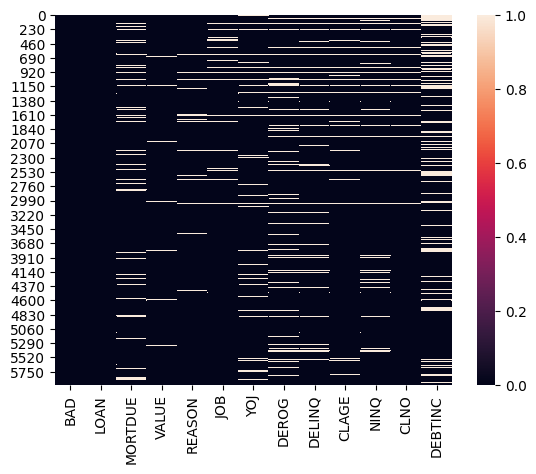

In [186]:
sns.heatmap(df.isna())  # quick visualization of the missing values in our data set
plt.show()

### Categorical features
Let's start with the two categorical features. The heatmap suggests that `REASON` exhibits more missing values than `JOB`. We will treat them differently for the sake of illustration. Now that we start altering our data frame more seriously, it is a good idea to make a copy of the data so that we can easily go back to a previous state.

In [187]:
# copy data
df_orig = df.copy()

#### Adding a new category level
One way to treat missing values in a categorical feature is to introduce a new category level "IsMissing". We will demonstrate this approach for the feature *REASON*. 
<br>One feature of the category data type in Pandas is that category levels are managed. We cannot add levels directly. Thus, before assigning the missing values our new category level *IsMissing*, we first need to introduce this level. We basically tell our data frame that *IsMissing* is another suitable entry for *REASON* next to the levels that already exist in the data frame. 

In [188]:
# Variable REASON: we treat missing values as a new category level.
# First we need to add a new level
df.REASON = df.REASON.cat.add_categories(['IsMissing'])

# Now we can do the replacement
df.REASON[df.REASON.isnull() ] = "IsMissing"
df.REASON.head()

0      HomeImp
1      HomeImp
2      HomeImp
3    IsMissing
4      HomeImp
Name: REASON, dtype: category
Categories (3, object): ['DebtCon', 'HomeImp', 'IsMissing']

In [189]:
df.REASON.isna().sum()  # verify that no more missing values exist

0

#### Mode replacement
For the feature *JOB*, which is multinomial, we replace missing values with the mode. Please note that this is a crude way to handle missing values. I'm not endorsing it! But you should have at least seen a demo. Here it is. 

In [190]:
# Determine the mode
mode_of_job = df.JOB.mode()
print(mode_of_job)

0    Other
Name: JOB, dtype: category
Categories (6, object): ['Mgr', 'Office', 'Other', 'ProfExe', 'Sales', 'Self']


In [191]:
# replace missing values with the mode
df.JOB[df.JOB.isnull() ] = df.JOB.mode()[0]  # the index [0] is necessary as the result of calling mode() is a Pandas Series
# verify that no more missing values exist
df.JOB.head()

0     Other
1     Other
2     Other
3     Other
4    Office
Name: JOB, dtype: category
Categories (6, object): ['Mgr', 'Office', 'Other', 'ProfExe', 'Sales', 'Self']

In [192]:
# Verify more seriously that missing value replacement was successful
if df.REASON.isnull().any() == False and df.JOB.isnull().any() == False:
    print('well done!')
else:
    print('ups')

well done!


### Numerical features
We have a lot of numerical features. To keep things simple, we simply replace all missing values with the median. Again, this is  a crude approach that should be applied with care; if at all. However, it nicely shows how we can process several columns at once using a loop. 

In [193]:
for col in df.select_dtypes(include='float32').columns:  # loop over all numeric columns
    if df[col].isna().sum() > 0:                         # check if there are any missing values in the current feature
        m = df[col].median(skipna=True)                  # compute the median of that feature
        df[col].fillna(m, inplace=True)                  # replace missing values with the median

Should you wonder whether it is necessary to write a loop to perform this rather standard operation, the answer is no. You could achieve the same result more elegantly when combining the `fillna()` method with a call to the method `transform()`. Here is how this would look like:
```python
# Alternative approach to impute missing values with the feature median
cols = df.select_dtypes(include='float32').columns 

df[cols] = df[cols].transform(lambda x: x.fillna(x.median()))
``` 
The function `transform()` applies a function to each column of the DataFrame. The lambda function takes each column, fills the missing values with the median of that column, and returns the transformed column. This way, you avoid looping over each column manually. This version can be considered more elegant, but our first shot, writing a loop, may legitimately be considered more readable.

In [194]:
# Verify there are no more missing values in the data
n_total_missing = df.isna().sum().sum()
if  n_total_missing == 0:
    print('Well done, no more missing values!')
else:
    print(f'Ups! There are still {n_total_missing} missing values.')


Well done, no more missing values!


# Summary of useful Pandas functions

Many useful tricks with `Pandas` (here `df` is a pandas DataFrame and `col` is one of its columns):

| Goal | Possible Code |
| --- | --- |
| Get df column (column name must have no spaces) | `df.col` |
| Get df column | `df["col"]` |
| Example condition: only select rows where `col1 > 1` | `df["col"] > 1` |
| Use index names to select rows and columns | `df.loc[row_list, col_list]` |
| Use index numbers to select rows and columns | `df.iloc[row_list, col_list]` |
| Get df column based on a condition | `df.loc[condition, ['col2','col3',...]]`|
| Group df by values of `col` | `df.groupby("col")` |
| Perform function on `col2` for each group of `col1` | `df.groupby("col1")["col2"].fun()` |
| Find value counts of each value in `col` | `df.groupby(['col']).size()`| 
| Get column mean and ignore null values | `df["col"].mean(skipna=True)` |
| Get column mode | `df["col"].mode()` |
| Get column median | `df["col"].median()` |
| Get rows of the 95th quantile of `col` | `df["col"].quantile(q=0.95)` |
| Filter `df` with a boolean condition | `df.query(condition)` |
| Create tally of `col2` by values of `col1` | `pd.crosstab(df['col1'], df['col2']`) |
| Pivot rows and columns | `df.pivot(index='col1', columns='col2', values='col3')` | 
| Sort values by `col` and save `df` in this order | `df.sort_values(by='col', inplace=True)` |
| Apply function to each column of `df` | `df.apply(fun)` |
| Save `df` as CSV in working directory | `df.to_csv('./file_name.csv', index=False)` |
| Count the number of times each value occurs | `df['col'].value_counts()` |
| Change column's data type | `df['col'] = df['col'].astype('type')` |
| Create boolean matrix of `df` where `True` indicates null value | `df.isnull()` | 
| Create boolean matrix of `df` where `True` indicates null value | `df.isna()` | 
| Create copy of df | `df_copy = df.copy()` |
| Add new category to categorical variable | `df.col.cat.add_categories(['New C'], inplace=True)` |
| Replace null values with `"IsMissing"` | `df.col[df.col.isnull()] = "IsMissing"` |
| Fill missing values with median and save `df` | `df['col'].fillna(median_value, inplace=True)` |
| Calculate time at execution (must import `time` library) | `time.time()` |

# Exercises


## 1. Dependency loan amount and credit risk
Examine the dependency between the loan amount (i.e., feature `LOAN`) and the default risk. You find  information on the latter in the column `df["BAD"]`. A value of 1 indicates that a borrower is a defaulter (i.e., bad risk). Specifically:
1. Calculate the average of the feature `LOAN`
2. Calculate the average `LOAN` amount separately for bad and good risk using logical indexing. 
3. Interpret the results of your analysis. Is there a dependency between `LOAN` and default risk?
4. Re-calculate the average `LOAN` amount for good and bad risk. This time, make use of the function `group_by`, which exists for data frames.  
5. Extend the previous task by computing the group-wise median for all numerical features in the data frame


**Extension:** a nice extension of subtasks 1 to 3 would be to secure your interpretation with a statistical hypothesis test. Perhaps you know a suitable test. If not, run a websearch for, e.g., *“statistical test for difference in means python”*.

In [195]:
# Solutions to the exercises


## 2. Outliers
The lecture introduced a rule of thumb saying that, for a given feature, a feature value $x$ can be considered an outlier if 
$$x >q_3(X) + 1.5 \cdot IQR(X)$$

where $q_3(X)$ denotes the third quantile of the distribution of feature $X$ and $IQR(X)$ the corresponding inter-quartile range.

1. Use the `Pandas` method `quantile` to compute the third and first quartile of feature `LOAN`.
2. Compute the threshold value that a feature value $x$ must not exceed to according to the above equation. Store the result in a variable. 
3. Use logical indexing to identify all upper outliers in the feature `LOAN`.
4. Create a new data frame that has no outliers in the feature `LOAN`. To that end: 
- Reuse your solution to task 3 to identify outliers using indexing
- Change the `LOAN` values for all outlier cases to the threshold you computed in step 2.
5. Write a custom function that implements the functionality you created in task 4. Make the feature to work on a argument of your function.
6. Call your custom function for all numerical features in the data frame. the goal is to create a data frame that does not have any upper outlier in any of its numerical features. 

In [ ]:
# Solutions 